In [151]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA


In [152]:
# Import dataset
df = pd.read_csv(r'psd_coffee.csv')
df.head()

,Country,Year,Arabica Production,Bean Exports,Bean Imports,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,...,Production,Roast & Ground Exports,Roast & Ground Imports,Robusta Production,"Rst,Ground Dom. Consum",Soluble Dom. Cons.,Soluble Exports,Soluble Imports,Total Distribution,Total Supply
0,Albania,1960,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albania,1961,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Albania,1962,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Albania,1963,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Albania,1964,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
# Only interested in 2023
df = df[df['Year'] == 2023]

In [154]:
# Inspect data
print(df.dtypes)
print(df.isnull().sum())

Country                   object
Year                       int64
Arabica Production         int64
Bean Exports               int64
Bean Imports               int64
Beginning Stocks           int64
Domestic Consumption       int64
Ending Stocks              int64
Exports                    int64
Imports                    int64
Other Production           int64
Production                 int64
Roast & Ground Exports     int64
Roast & Ground Imports     int64
Robusta Production         int64
Rst,Ground Dom. Consum     int64
Soluble Dom. Cons.         int64
Soluble Exports            int64
Soluble Imports            int64
Total Distribution         int64
Total Supply               int64
dtype: object
Country                   0
Year                      0
Arabica Production        0
Bean Exports              0
Bean Imports              0
Beginning Stocks          0
Domestic Consumption      0
Ending Stocks             0
Exports                   0
Imports                   0
Other Product

In [155]:
# Distribution of each column
df.describe()

,Year,Arabica Production,Bean Exports,Bean Imports,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,Other Production,Production,Roast & Ground Exports,Roast & Ground Imports,Robusta Production,"Rst,Ground Dom. Consum",Soluble Dom. Cons.,Soluble Exports,Soluble Imports,Total Distribution,Total Supply
count,94.0,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.0,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,2023.0,1035.265957,1275.797872,1253.244681,293.914894,1803.191489,282.223404,1513.042553,1480.872340,0.0,1823.670213,55.436170,48.531915,788.404255,1518.234043,284.957447,181.808511,179.095745,3598.457447,3598.457447
std,0.0,4885.910915,4911.478926,5443.942017,1234.553027,5678.850539,1208.314939,5422.901973,5563.225256,0.0,7568.865882,320.764797,132.263154,3650.711612,5383.081556,787.587550,610.661043,636.706361,10249.919590,10249.919590
min,2023.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2023.0,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,42.500000,42.500000
50%,2023.0,0.000000,0.000000,7.500000,0.000000,190.000000,0.000000,0.000000,55.000000,0.0,0.000000,0.000000,0.000000,0.000000,87.500000,0.000000,0.000000,0.000000,400.000000,400.000000
75%,2023.0,98.750000,176.250000,587.500000,10.750000,897.500000,10.000000,430.750000,797.500000,0.0,430.000000,0.000000,5.000000,0.000000,677.500000,275.000000,0.000000,97.500000,2210.250000,2210.250000
max,2023.0,44900.000000,39500.000000,47000.000000,9313.000000,43125.000000,9088.000000,43850.000000,47000.000000,0.0,66300.000000,2500.000000,700.000000,26620.000000,41000.000000,6350.000000,4300.000000,5500.000000,70995.000000,70995.000000


In [156]:
# Generate training and test data and standardise data
X = df.drop('Exports', axis=1)
y = df['Exports']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
sc = StandardScaler()
numeric_columns = X_train.select_dtypes(include = ['int64']).columns
X_train = pd.DataFrame(sc.fit_transform(X_train[numeric_columns]), columns = numeric_columns)
X_train.head()

,Year,Arabica Production,Bean Exports,Bean Imports,Beginning Stocks,Domestic Consumption,Ending Stocks,Imports,Other Production,Production,Roast & Ground Exports,Roast & Ground Imports,Robusta Production,"Rst,Ground Dom. Consum",Soluble Dom. Cons.,Soluble Exports,Soluble Imports,Total Distribution,Total Supply
0,0.0,0.394728,0.320089,-0.244432,-0.245454,-0.219907,-0.235970,-0.215870,0.0,0.171480,-0.187132,-0.319254,-0.176413,-0.241989,0.082738,-0.304608,0.295144,-0.021023,-0.021023
1,0.0,-0.198708,-0.211671,-0.244432,-0.239784,-0.304526,-0.227264,-0.272724,0.0,-0.196263,-0.198000,-0.357495,-0.144241,-0.274582,-0.333624,-0.326410,-0.237062,-0.322408,-0.322408
2,0.0,-0.198708,-0.247723,-0.115953,0.100464,0.762137,-0.027737,0.722233,0.0,-0.177001,-0.198000,-0.357495,-0.103408,-0.189025,7.323816,-0.326410,8.008389,0.275283,0.275283
3,0.0,-0.203231,-0.247723,-0.083833,-0.253961,-0.161683,-0.245403,-0.114795,0.0,-0.229535,-0.198000,-0.357495,-0.208584,-0.123838,-0.339658,-0.326410,-0.237062,-0.262596,-0.262596
4,0.0,-0.203231,-0.247723,-0.229978,-0.253961,-0.302973,-0.245403,-0.258511,0.0,-0.229535,-0.198000,-0.357495,-0.208584,-0.272138,-0.339658,-0.326410,-0.237062,-0.340911,-0.340911


In [157]:
# Concat export value into dataframe and remove irrelevant columns
y_train = y_train.reset_index()
merged_train = pd.concat([X_train, y_train], axis=1)
merged_train = merged_train.drop(['Year', 'Other Production', 'Total Distribution', 'index'], axis=1)
merged_train.head()

,Arabica Production,Bean Exports,Bean Imports,Beginning Stocks,Domestic Consumption,Ending Stocks,Imports,Production,Roast & Ground Exports,Roast & Ground Imports,Robusta Production,"Rst,Ground Dom. Consum",Soluble Dom. Cons.,Soluble Exports,Soluble Imports,Total Supply,Exports
0,0.394728,0.320089,-0.244432,-0.245454,-0.219907,-0.235970,-0.215870,0.171480,-0.187132,-0.319254,-0.176413,-0.241989,0.082738,-0.304608,0.295144,-0.021023,3169
1,-0.198708,-0.211671,-0.244432,-0.239784,-0.304526,-0.227264,-0.272724,-0.196263,-0.198000,-0.357495,-0.144241,-0.274582,-0.333624,-0.326410,-0.237062,-0.322408,200
2,-0.198708,-0.247723,-0.115953,0.100464,0.762137,-0.027737,0.722233,-0.177001,-0.198000,-0.357495,-0.103408,-0.189025,7.323816,-0.326410,8.008389,0.275283,0
3,-0.203231,-0.247723,-0.083833,-0.253961,-0.161683,-0.245403,-0.114795,-0.229535,-0.198000,-0.357495,-0.208584,-0.123838,-0.339658,-0.326410,-0.237062,-0.262596,0
4,-0.203231,-0.247723,-0.229978,-0.253961,-0.302973,-0.245403,-0.258511,-0.229535,-0.198000,-0.357495,-0.208584,-0.272138,-0.339658,-0.326410,-0.237062,-0.340911,0


In [158]:
# Mutual Information Scores for Each Variable
def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(merged_train.drop('Exports', axis=1), merged_train['Exports'])
print(mi_scores)

Bean Exports              0.908491
Production                0.695112
Total Supply              0.339083
Arabica Production        0.255589
Robusta Production        0.208737
Ending Stocks             0.186226
Roast & Ground Exports    0.133575
Soluble Exports           0.108373
Domestic Consumption      0.092903
Beginning Stocks          0.081407
Rst,Ground Dom. Consum    0.060186
Bean Imports              0.048054
Imports                   0.030445
Roast & Ground Imports    0.024354
Soluble Dom. Cons.        0.007800
Soluble Imports           0.000000
Name: MI Scores, dtype: float64


Text(0.5, 1.0, 'Correlation matrix')

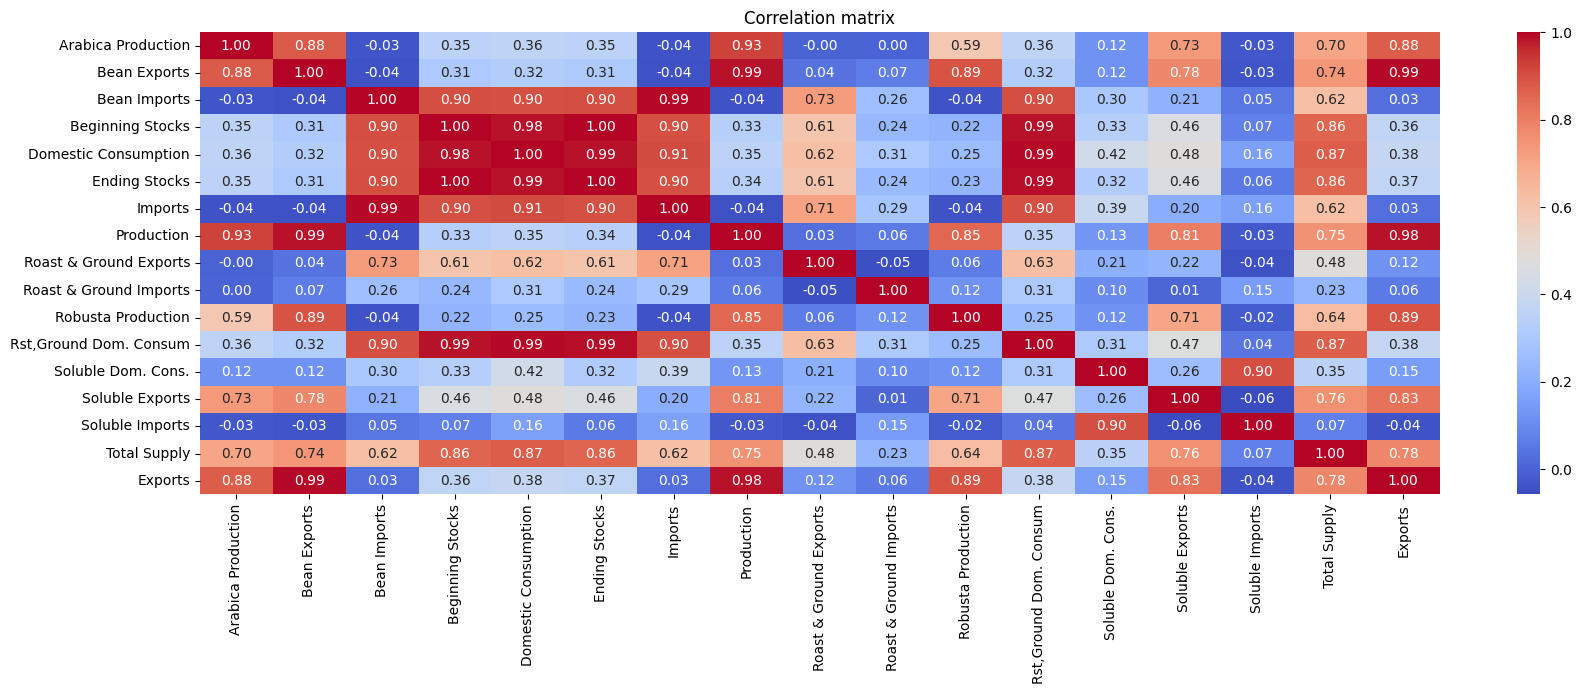

In [159]:
# Create heatmap
correlation_matrix = np.corrcoef(merged_train, rowvar=False)
plt.figure(figsize=(20,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", 
            xticklabels=merged_train.columns, 
            yticklabels=merged_train.columns)
plt.title('Correlation matrix')

In [160]:
# Define PCA function
def apply_pca(features:list):
    X = merged_train.copy()
    y = X.pop('Exports')
    X = X.loc[:, features]
    pca = PCA()
    X_pca = pca.fit_transform(X)
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    loadings = pd.DataFrame(
        pca.components_.T,
        columns=component_names,
        index=X.columns,
    )
    return pca, X_pca, loadings

In [161]:
# Define plot variance function
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

                         PC1       PC2       PC3       PC4           PC5
Bean Exports        0.475921  0.077050 -0.266032  0.834739  0.000000e+00
Arabica Production  0.433521 -0.658736 -0.235934 -0.261558 -5.040321e-01
Robusta Production  0.423744  0.741375 -0.118530 -0.347802 -3.684938e-01
Production          0.479633 -0.075317 -0.208155 -0.332847  7.811299e-01
Soluble Exports     0.419465 -0.069428  0.903429  0.055177 -2.775558e-17


array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

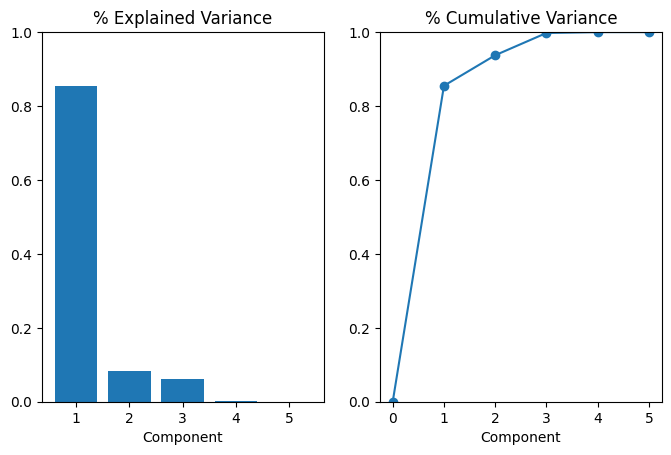

In [165]:
# Apply PCA on Bean Exports, Arabica Production, Robusta Production, Production and Soluble Exports
pca, X_pca, loadings = apply_pca(features=['Bean Exports', 'Arabica Production', 'Robusta Production', 'Production', 'Soluble Exports'])
print(loadings)
plot_variance(pca)

In [166]:
# MI scores for each of the principal components
mi_scores = make_mi_scores(X_pca, merged_train['Exports'])
mi_scores

PC1    0.609649
PC3    0.442103
PC2    0.351984
PC4    0.213593
PC5    0.000000
Name: MI Scores, dtype: float64

                             PC1       PC2       PC3       PC4       PC5  \
Total Supply            0.335926  0.710526  0.535522  0.304921  0.016930   
Bean Imports            0.368450 -0.487107  0.252572  0.383593 -0.403644   
Beginning Stocks        0.391827  0.065244 -0.492446  0.298264  0.334738   
Domestic Consumption    0.392531  0.084622  0.072152 -0.697374  0.279572   
Ending Stocks           0.392231  0.070024 -0.482489  0.204594  0.051402   
Imports                 0.368421 -0.484267  0.381805 -0.055320  0.412994   
Rst,Ground Dom. Consum  0.392696  0.083928 -0.152132 -0.373724 -0.688018   

                             PC6       PC7  
Total Supply           -0.019616 -0.043302  
Bean Imports            0.078604  0.496919  
Beginning Stocks        0.630493 -0.034344  
Domestic Consumption    0.013374  0.518540  
Ending Stocks          -0.750533  0.025591  
Imports                -0.103551 -0.547384  
Rst,Ground Dom. Consum  0.147357 -0.425264  


array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

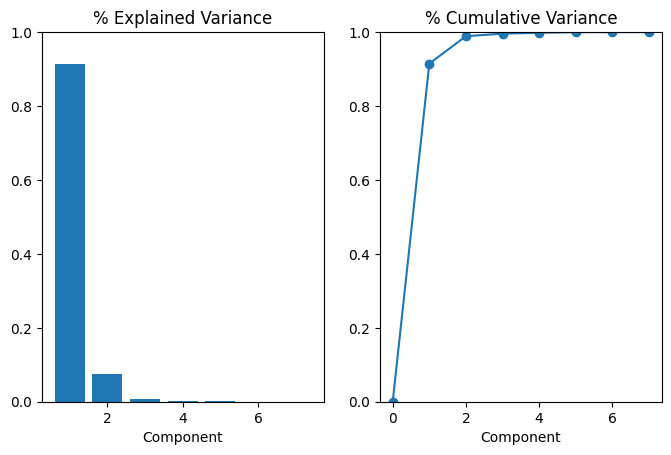

In [167]:
# Apply PCA on Total Supply, Bean Imports, Beginning Stocks, Domestic Consumption, Ending Stocks, Imports, Rst,Ground Dom. Consum
pca, X_pca, loadings = apply_pca(features=['Total Supply', 'Bean Imports', 'Beginning Stocks', 'Domestic Consumption', 'Ending Stocks', 'Imports', 'Rst,Ground Dom. Consum'])
print(loadings)
plot_variance(pca)

In [168]:
# MI scores for each of the principal components
mi_scores = make_mi_scores(X_pca, merged_train['Exports'])
mi_scores

PC2    0.410743
PC4    0.368623
PC5    0.292498
PC3    0.248677
PC6    0.209384
PC7    0.129768
PC1    0.016279
Name: MI Scores, dtype: float64